# Desafio Oficina de aprendizado de máquinas da comunidade AI Girls - Grupo C

### Integrantes : 
Ana Maria Bender, Klara Narumi e Larissa Rocha

### Data:
01/05/2021

# Proposta do Desafio

### Preveja a nota final de alunos do ensino médio

#### A escola chamada Todos Unidos solicitou para a nossa consultoria AI Girls, que seja construída uma inteligencia artificial que:

* possa calcular a nota final dos alunos de ensino médio;
* identifique quais pontos influenciam nas notas dos alunos.

#### O objetivo é que com esta inteligência artificial possibilite que a escola foque em outras questões relacionadas à melhoria da educação de seus alunos. 

## Perguntas parar entender o problema:

### 1. Quais os Objetivos Gerais? Quais os Objetivos Especificos?

O objetivo é criar um modelo que estime a nota final do aluno baseado em aspectos demográficos, sociais, hábitos do aluno e suas notas prévias. Também é objetivo descobrir quais dessas características colaboram mais na hora de estimar a nota final.


### 2. Qual é o problema que você está tentando resolver?

Descobrir quais fatores colaboram mais para a nota final dos alunos e predizer essas notas finais.


### 3. Por que ele é importante?

A partir dos resultados desta análise é hipotéticamente possível criar planos de ações para mitigar que alunos percam um ano de estudos focando em estratégias de melhorias de certos aspéctos a serem descobertos pelo modelo. 


### 4. A partir de uma solução hipotética para o problema, como esta solução afetaria a empresa?

A escola poderia desprender uma atenção especializada para certos grupos de alunos com caracteristicas específicas, como uma medida preventiva de reprovação escolar ou de baixo rendimento escolar. Isso hipotéticamente aumentaria a confiança dos pais e alunos ao escolher uma escola que se preocupa com o desenvolvimento do seu aluno e procura soluções inteligentes para evitar possiveis reprovações e até mesmo a evasão escolar por este aluno nao se sentir entendido ou acolhido com suas especificidades nas atividades escolares.


### 5. Temos capacidade de agir com base nessa solução ou também precisamos desenvolver essa habilidade?

Obviamente, que sim!


### 6. Como vamos medir o sucesso da solução implementada [key performance indicator (KPI)] O que faria dela um sucesso? Qual métrica será utilizada?

R2 and Mean Absolute Error
[normalização]

# Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
from matplotlib import pyplot


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_graphviz 
#!pip install graphviz
from graphviz import render

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 

pd.set_option('display.max_columns', None) # o que é isso?

# Banco dos dados

#### Link do banco de dados: https://www.kaggle.com/dipam7/student-grade-prediction

### Features (todas)

* school: Escola do aluno (binário: 'GP' Gabriel Pereira ou 'MS' Mousinho da Silveira)
* sex: sexo do aluno (binário: 'F' Feminino ou 'M' masculino)
* age: idade do aluno (numérico: de 15 a 22)
* address: tipo de endereço residencial do aluno (binário: 'U' urbano ou 'R' rural)
* famsize: tamanho da família (binário: 'LE3' menor ou igual a 3 ou 'GT3' maior que 3)
* Pstatus: status de coabitação dos pais (binário: 'T' vivendo juntos ou 'A' separados)
* Medu: escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio, 4 - ensino superior )
* Fedu: escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio, 4 - ensino superior 
* Mjob: trabalho da mãe (nominal: 'professora', 'cuidados de saúde' relacionados, 'serviços' civis(administrativo ou policial), 'em_casa' ou 'outro')
* Fjob: trabalho do pai (nominal: 'professora', 'cuidados de saúde' relacionados, 'serviços' civis(administrativo ou policial), 'em_casa' ou 'outro')
* reason: razão para escolher esta escola (nominal: perto de 'casa', 'reputação' da escola, preferência de 'curso' ou 'outra)
* guardian: tutor do aluno (nominal: 'mãe', 'pai' ou 'outro')
* traveltime: tempo de viagem de casa até a escola (numérico: 1 - 1 hora)
* studytime: tempo de estudo semanal (numério 1 - 10 horas)
* failures: número de falhas de classe anteriores (numéricos: n se 1<= n < 3, senão 4)
* schoolsup: suporte educacional extra (binário: sim ou não)
* famsup: apoio educacional à família (binário: sim ou não
* paid: aulas extras pagas dentro da disciplina (Matemática ou Português) (binário: sim ou não)
* activities: atividades extracurriculares (binária: sim ou não)
* nursery: frequentou creche (binário: sim ou não)
* higher: quer fazer ensino superior (binário: sim ou não)
* internet: tem acesso à internet em casa (binário: sim ou não)
* romantic: com um relacionamento romântico (binário: simm ou não)
* famrel: qualidade das relações familiares (numérico de 1- muito ruim a 5-excelente)
* freetime: tempo livre depois da escola (numérico de 1 - muito baixo a 5- muito alto)
* goout: sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)
* Dalc: consumo de álcool durante o trabalho (numérico: de 1 - muito baixo a 5 - muito alto)
* Walc: consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto) 
* health: estado de saúde atual (numérico: de 1- muito ruim a 5- muito bom)
* absences: numero de faltas escolares (numérico de 0 a 93)
* G1: nota grau 1 (numérico: 0-20)
* G2: nota grau 2 (numérico: 0-20)
* G3: nota final (numérico: 0-20)

In [2]:
# importar dados
df_alunos = pd.read_csv('data/student-mat.csv',low_memory=False)

In [3]:
df_alunos.shape

(395, 33)

In [4]:
df_alunos.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df_alunos.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


## Existem dados faltantes?

In [6]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

<span style="color:pink"> <font size="3"> Não existe dados faltantes </font></span>

## Análise de exploratória de dados

<span style="color:red">Proposta de análise exploratória: relacionar atributos que consideramos importantes com a nota. Tentar visualizar quais características tem maior impacto na nota. </span>

### Preparação dos dados (para matrix de correlação)


In [7]:
categoricas = ['school',\
               'sex',\
               'address',\
               'famsize',\
               'Pstatus',\
               'Mjob',\
               'Fjob',\
               'reason',\
               'guardian',\
               'schoolsup',\
               'famsup',\
               'paid',\
               'activities',\
               'nursery',\
               'higher',\
               'internet',\
               'romantic',
              ]

In [8]:
le = LabelEncoder()
# apply le on categorical feature columns
df_alunos[categoricas] = df_alunos[categoricas].apply(lambda col: le.fit_transform(col))

In [9]:
df_alunos.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,1,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,1,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,1,5,0,14,15,15


### Visualizações (características e G3)

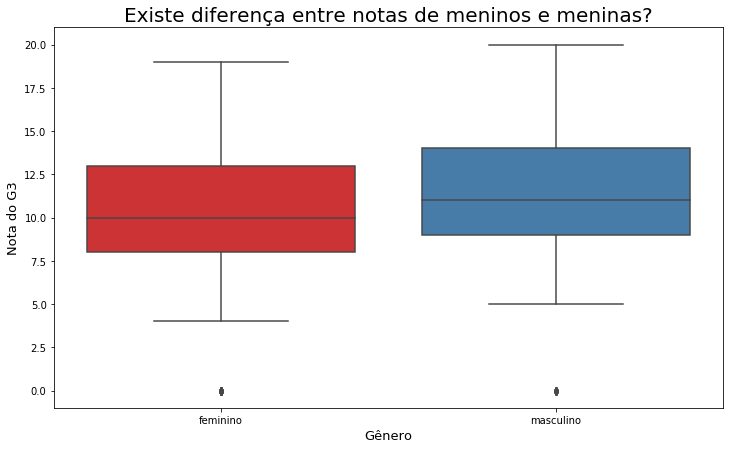

In [10]:
'''
plt.figure(figsize=(8,6))
b = sns.boxplot(x = 'sex', y = 'G3', data = df_alunos)
b.axes.set_title("Existe diferença entre notas de meninos e meninas?", fontsize = 20)
b.axes.set_xlabel("Gênero")
b.axes.set_ylabel("Nota do G3")
#0 - F
#1 - M
'''
plt.figure(figsize=(12,7)) # aumentei um pouco pare centralizar o gráfico
sns.boxplot(x = 'sex', y = 'G3', palette="Set1", data = df_alunos)
plt.title("Existe diferença entre notas de meninos e meninas?", fontsize = 20)
plt.xlabel("Gênero", fontsize = 13)
plt.ylabel("Nota do G3", fontsize = 13)
plt.xticks([0,1],['feminino','masculino'])
plt.show()

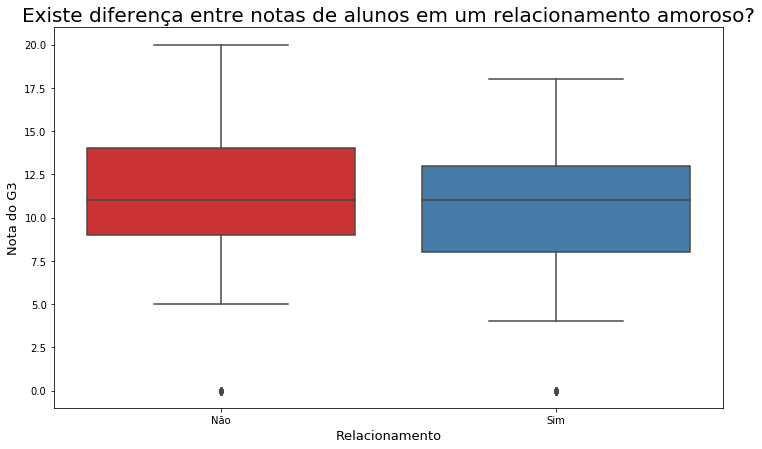

In [11]:
'''
plt.figure(figsize=(8,6))
b = sns.boxplot(x = 'romantic', y = 'G3', data = df_alunos)
b.axes.set_title("Existe diferença entre notas de alunos em um relacionamento amoroso?", fontsize = 20)
b.axes.set_xlabel("Relacionamento")
b.axes.set_ylabel("Nota do G3")

# 0 - no
# 1 - yes
'''
plt.figure(figsize=(12,7))
sns.boxplot(x = 'romantic', y = 'G3', palette="Set1", data = df_alunos)
plt.title("Existe diferença entre notas de alunos em um relacionamento amoroso?", fontsize = 20)
plt.xlabel("Relacionamento", fontsize = 13)
plt.ylabel("Nota do G3", fontsize = 13)
plt.xticks([0,1],['Não','Sim'])
plt.show()

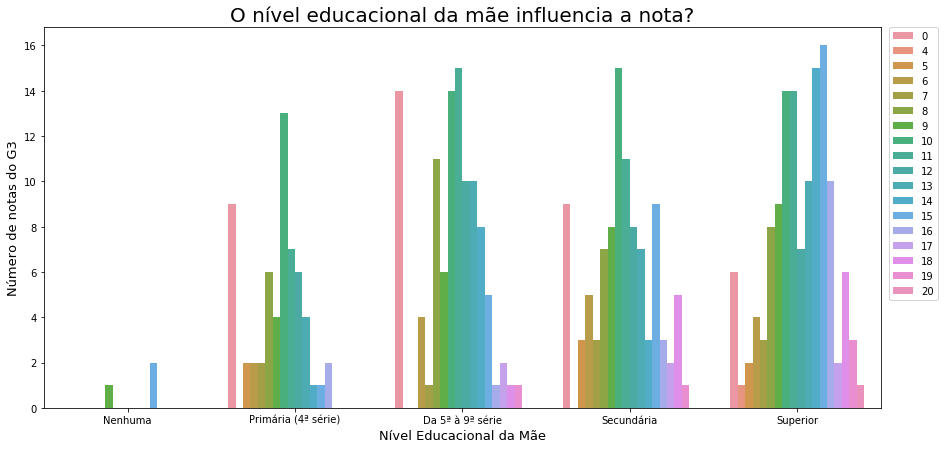

In [12]:
plt.figure(figsize=(15,7))
d = sns.countplot(x = df_alunos['Medu'], hue = df_alunos['G3'])
d.set_title("O nível educacional da mãe influencia a nota?", fontsize = 20)
d.set_xlabel("Nível Educacional da Mãe", fontsize = 13)
d.set_ylabel("Número de notas do G3", fontsize = 13)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) #posiciona a legenda fóra da área de plotagem
d.set_xticks(range(5))
d.set_xticklabels(['Nenhuma', 'Primária (4ª série)', 'Da 5ª à 9ª série', 'Secundária', 'Superior'])
plt.show() # o plt.show() tira as informações que veem junto com o gráfico

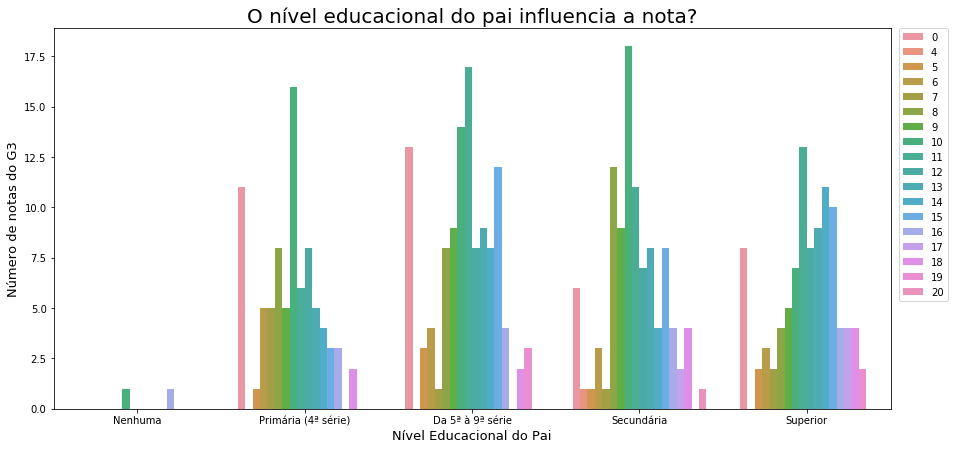

In [13]:
plt.figure(figsize=(15,7))
d = sns.countplot(x = df_alunos['Fedu'], hue = df_alunos['G3'])
d.set_title("O nível educacional do pai influencia a nota?", fontsize = 20)
d.set_xlabel("Nível Educacional do Pai", fontsize = 13)
d.set_ylabel("Número de notas do G3", fontsize = 13)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0) #posiciona a legenda fóra da área de plotagem
d.set_xticks(range(5))
d.set_xticklabels(['Nenhuma', 'Primária (4ª série)', 'Da 5ª à 9ª série', 'Secundária', 'Superior'])
plt.show() # o plt.show() tira as informações que veem junto com o gráfico

<span style="color:red"> Plot Violino: Mistura de boxplot com estimação de densidade. O objetivo do gráfico violin plot é o mesmo do que o boxplot original porém, considera de alguma maneira o comportamento dos dados dentro da caixa (box). Assim, percebemos melhor a distribuição dos dados dentro do intervalo interquartil.  </span>
Fonte: https://docs.ufpr.br/~lucambio/CE224/1S2015/Boxplot.pdf


![box_violin.gif](attachment:box_violin.gif)

Fonte: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d

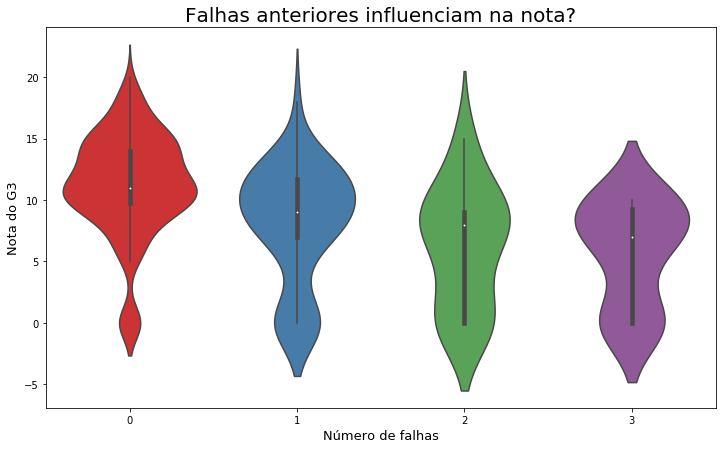

In [14]:
'''
plt.figure(figsize=(10,8))
b = sns.violinplot(x = 'failures', y = 'G3', data = df_alunos)
b.axes.set_title('Falhas anteriores influenciam na nota?', fontsize = 20)
b.set_xlabel('Número de falhas')
b.set_ylabel('Nota do G3')
'''
plt.figure(figsize=(12,7))
sns.violinplot(x = 'failures', y = 'G3', palette="Set1", data = df_alunos)
plt.title('Falhas anteriores influenciam na nota?', fontsize = 20)
plt.xlabel('Número de falhas', fontsize = 13)
plt.ylabel('Nota do G3', fontsize = 13)
plt.show()

Conclusões para esse conjunto de dados:
* Os alunos do sexo masculino mostram um desempenho um pouco melhor nas notas do G3
* Alunos que não estão em um relacionamento amoroso apresentam um melhor desempenho geral
* A quantidade de notas mais altas tende a aumentar com o aumento do nível educacional dos pais
* Alunos com menos falhas apresentam notas mais altas

<span style="color:red"> 
    O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa. As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro quartil formam o boxplot.</span>

    Fonte: https://operdata.com.br/blog/como-interpretar-um-boxplot/ 

### Como as features se correlacionam?


In [ ]:
#X = df_alunos.iloc[:,0:32]  #independent columns
#y = df_alunos.iloc[:,-1]    #target column i.e G3
#df = df_alunos.drop(df_alunos.iloc[:,30:32], axis=1)
df = df_alunos
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#na linha de cima tá salvando no 'g', acredito que não precisa.
plt.show()

# Seleção de variável
### Video de seleção de variávei da Wal

## Exportar dados em um arquivo .csv para rodar o modelo em outro notebook (por enquanto ainda estão todas as features, depois removemos a que não iremos utilizar <3 )

In [ ]:
df_alunos.to_csv('df_modelo.csv', index=False)

In [ ]:
# dividir em treino e teste
0.7 treino
0.3 teste

# Avaliação

In [ ]:
# quanto mais proximo de 1 melhor o modelo
print(r2_score(y, regr_1.predict(X)))

In [ ]:
# desvio médio entre observado e predito.
mean_absolute_error(y, y_pred)

# Referências? Precisamos?
Tipo a matrix de correlação não fui eu que inventei, peguei o codigo daquele link que mandei para vocês no grupo, seria interessante adicionar aqui?